# **Cracking the AI Black Box: Explainable AI with SHAP!**  

---

### **📝 Description**  
Artificial Intelligence (AI) models often feel like **mysterious black boxes**—they make predictions, but we don’t always know **why** they made those choices.  
**Explainable AI (XAI)** helps us **open this black box** and **understand how AI models make decisions**.  

In this lab, we will use **SHAP (SHapley Additive exPlanations)**, a powerful explainability tool, to analyze a **house price prediction model** and see which factors influence the price the most.


---



### **🧐 What is SHAP and Explainable AI?**  
AI models make predictions based on **patterns in data**, but they often do so in a way that is difficult to understand. **Explainable AI (XAI)** aims to make these decisions more transparent and interpretable.  

🔹 **SHAP (SHapley Additive exPlanations)** is a **game-theory-based method** used to explain the predictions of machine learning models.  
🔹 It **breaks down a prediction** into contributions from each feature.  
🔹 SHAP is used in **healthcare, finance, and real estate** to ensure fairness and transparency in AI models.  

✅ **SHAP helps answer questions like:**  
- Why did the AI **predict this price** for a house?  
- Which factors had the **most impact** on the decision?  
- How can we **trust** AI predictions?  

---

### **🎭 Scenario**  
Imagine you work for a **real estate company** that uses AI to **predict house prices**. 🏡  
Your boss asks:  
👉 **"How does our AI decide house prices?"**  
👉 **"Can we explain its decisions to customers?"**  

🔍 **Your mission:**  
- **Train an AI model** to predict house prices.  
- **Use SHAP to explain the AI’s decisions**.  
- **Create visualizations** to help your boss understand the results.  

By the end of this lab, you will have a **fully explainable AI model** that anyone can understand! 🎯  



### **🛠 Step 1: Install and Import Required Libraries**  
To use SHAP, we first need to install  the necessary libraries.

#### 🔍 Explanation  
- **shap**: Helps us understand how AI models make decisions.  
- **interpret**: A library that includes SHAP and other interpretability techniques.  
- **datasets**: Allows us to load predefined datasets easily.  
- **sklearn**: Allows us to train a machine learning model.  
- **matplotlib.pyplot**: Helps us create visualizations of SHAP values.  

✅ Run this code to install and import the required libraries.


In [ ]:
!pip install shap interpret datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 29.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/144.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━

### **🛠 Step 2: Load the Housing Dataset and Train a Machine Learning Model**  
In this step, we will **load a real-world housing dataset** and train a **Linear Regression model** to predict house prices.

#### 🔍 Explanation  
1. **Importing Required Libraries**  
   - `import sklearn`: Imports **Scikit-Learn**, a popular machine learning library.  
   - `import shap`: Imports **SHAP (SHapley Additive exPlanations)**, which helps explain model predictions.  

2. **Loading the California Housing Dataset**  
   - `shap.datasets.california(n_points=1000)`: Loads a **classic housing price dataset** containing **1000 samples**.  
   - `X`: Represents **independent variables (features)** such as **income, location, and population**.  
   - `y`: Represents the **dependent variable (target)**, which is the **house price**.  

3. **Sampling Background Data for SHAP**  
   - `shap.utils.sample(X, 100)`: Selects **100 random instances** from `X` to be used as a **background distribution** for SHAP.  
   - SHAP compares each new prediction against this reference set to determine feature importance.  

4. **Training a Simple Linear Regression Model**  
   - `sklearn.linear_model.LinearRegression()`: Creates a **Linear Regression model**.  
   - `model.fit(X, y)`: Trains the model to **find patterns** between house attributes (`X`) and house prices (`y`).  
   - The model **assigns weights** to each feature, indicating **how much each factor affects the predicted price**.  

✅ Run this step to **load the dataset, prepare background data, and train the model**.  

**Commands to load dataset and train model:**  


In [ ]:
import sklearn

import shap

# a classic housing price dataset
X, y = shap.datasets.california(n_points=1000)

X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution

# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

### **🛠 Step 3: Examine Model Coefficients**  
After training the **Linear Regression model**, we now analyze the **coefficients assigned to each feature**. This helps us understand **which features are most influential** in predicting house prices.

#### 🔍 Explanation  
1. **What Are Model Coefficients?**  
   - In **Linear Regression**, each feature (`X`) is assigned a **coefficient (`β`)**, which represents **how much it affects the predicted house price (`y`)**.  
   - A **higher absolute value** of a coefficient means that the feature has a **greater impact** on the prediction.

2. **Printing Model Coefficients**  
   - `print("Model coefficients:\n")`: Displays the header before printing coefficients.  
   - `for i in range(X.shape[1])`: Iterates over all features in `X`.  
   - `print(X.columns[i], "=", model.coef_[i].round(5))`:  
     - Prints the **feature name** and its **coefficient** rounded to 5 decimal places.  
     - If a coefficient is **positive**, it **increases house prices**.  
     - If a coefficient is **negative**, it **lowers house prices**.

3. **Why Is This Important?**  
   - Helps us **interpret the model** by showing **which factors influence house prices the most**.  
   - If a coefficient is close to **zero**, it means the feature **has little effect** on predictions.  

✅ Run this step to **examine feature importance through model coefficients**.  

**Command to print model coefficients:**  


In [ ]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

MedInc = 0.42563
HouseAge = 0.01033
AveRooms = -0.1161
AveBedrms = 0.66385
Population = 3e-05
AveOccup = -0.26096
Latitude = -0.46734
Longitude = -0.46272


### **🛠 Step 4: Visualize Feature Impact Using Partial Dependence Plot**  
In this step, we use a **Partial Dependence Plot (PDP)** to visualize how the feature **MedInc** (Median Income) impacts house prices. PDPs show the **relationship** between a feature and the predicted outcome, while keeping other features constant.

#### 🔍 Explanation  
1. **What is a Partial Dependence Plot (PDP)?**  
   - A **PDP** shows how the **predicted house price** changes as we vary the value of a specific feature (e.g., **Median Income** or **MedInc**) while **holding all other features constant**.
   - This allows us to see if there is a **linear or non-linear relationship** between the feature and the predicted price.

2. **Using `shap.partial_dependence_plot`**  
   - `shap.partial_dependence_plot("MedInc", model.predict, X100, ...)`:  
     - `"MedInc"`: Specifies the **feature** for which we want to generate the plot.  
     - `model.predict`: Uses the trained model to make predictions for the given dataset.  
     - `X100`: The subset of the data used as the background distribution.  
     - `ice=False`: **Individual Conditional Expectation** (ICE) plots are **disabled**. ICE plots show the impact of a feature for each individual instance, whereas PDP shows the **average effect**.  
     - `model_expected_value=True`: Plots the **expected value** of the model’s output (average prediction).  
     - `feature_expected_value=True`: Shows the **average value** of the feature (`MedInc` in this case) in the dataset.

3. **Why Is This Important?**  
   - The PDP helps us understand **how varying a feature (like income)** affects predictions (house prices).  
   - If the plot shows an **increasing trend**, it means higher median income is associated with higher house prices.  
   - This is useful for identifying trends and **interpreting the model's behavior**.

✅ Run this step to **visualize how Median Income affects house prices**.  

**Command to generate Partial Dependence Plot:**  


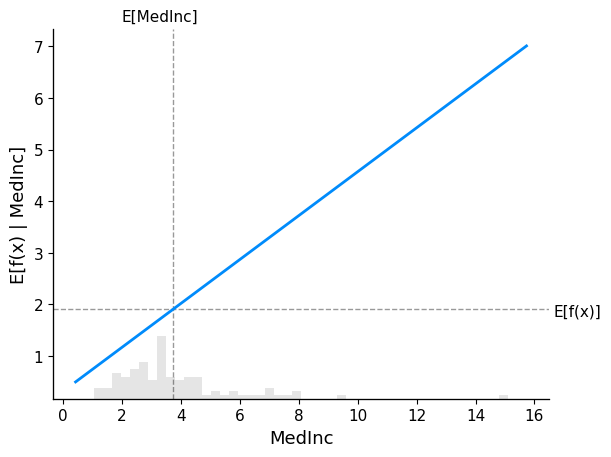

In [ ]:
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

### **🛠 Step 5: Compute SHAP Values and Create a Standard Partial Dependence Plot**  
In this step, we calculate the **SHAP values** for the linear regression model and use them to create a **Partial Dependence Plot (PDP)** for the feature **MedInc** (Median Income). The SHAP values give us a detailed view of how each feature impacts individual predictions.

#### 🔍 Explanation  
1. **Computing SHAP Values**  
   - `explainer = shap.Explainer(model.predict, X100)`:  
     - Creates an **explainer** that can compute the **SHAP values** for the trained model's predictions.
     - `model.predict`: The trained model is used to make predictions for the dataset.
     - `X100`: The background data used for SHAP calculation.  
     
   - `shap_values = explainer(X)`:  
     - Computes the **SHAP values** for the full dataset (`X`).
     - The SHAP values represent the **contribution of each feature** to the model's prediction for each instance.

2. **Creating a Standard Partial Dependence Plot (PDP)**  
   - `sample_ind = 20`:  
     - Selects the **20th sample** to demonstrate how **SHAP values** affect the prediction.  
     - You can modify `sample_ind` to visualize other data points.
     
   - `shap.partial_dependence_plot(...)`:  
     - **`"MedInc"`**: Specifies that we are interested in **Median Income**.
     - **`shap_values[sample_ind : sample_ind + 1, :]`**: Passes the SHAP values for the selected sample to the PDP. This helps visualize the impact of **MedInc** on predictions using SHAP values.
     - `ice=False`: Disables **Individual Conditional Expectation** (ICE) curves and uses the **average effect** for the plot.
     - `model_expected_value=True`: Displays the **expected output** of the model, which represents the average prediction across all instances.
     - `feature_expected_value=True`: Displays the **average value** of the feature (Median Income) across the dataset.

3. **Why Is This Important?**  
   - **SHAP values** give a detailed explanation of **how much each feature contributes** to the predicted house price for each instance.  
   - The **Partial Dependence Plot** helps us visualize the **global effect** of Median Income on the predicted price while using SHAP values to account for interactions with other features.
   - This allows us to **trust and interpret the model's predictions** more accurately.

✅ Run this step to **compute SHAP values** and create a **PDP for Median Income**.  

**Command to compute SHAP values and generate the plot:**  


ExactExplainer explainer: 1001it [00:27, 36.91it/s]                          


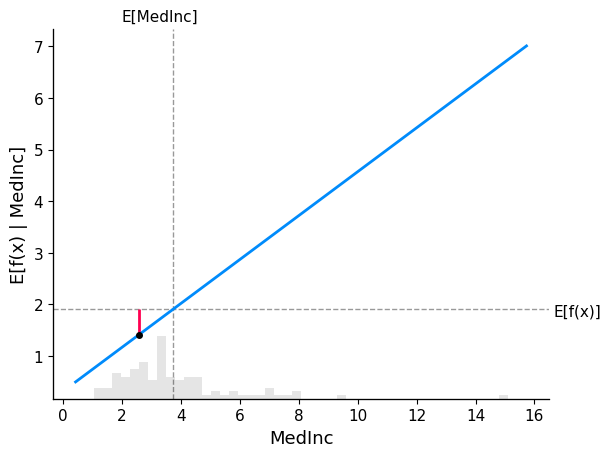

In [ ]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 20
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[sample_ind : sample_ind + 1, :],
)

### **🛠 Step 6: Visualize SHAP Values for the Feature "MedInc"**  
In this step, we use a **scatter plot** to visualize the **SHAP values** for the feature **MedInc** (Median Income). This will show how **changes in Median Income** affect the **model's predictions** for different instances.

#### 🔍 Explanation  
1. **What Are SHAP Values in the Scatter Plot?**  
   - SHAP values represent **how much each feature** contributes to the **model's prediction** for a given instance.
   - Positive SHAP values indicate that the feature **increases** the predicted house price, while negative SHAP values indicate that the feature **decreases** the predicted price.

2. **Using `shap.plots.scatter`**  
   - `shap.plots.scatter(shap_values[:, "MedInc"])`:  
     - `shap_values[:, "MedInc"]`: Selects the **SHAP values for the "MedInc" feature** across all instances.  
     - The scatter plot will show the relationship between the **SHAP value** and the **feature value** (Median Income).
     - Each **point** represents an instance (house), and the **x-axis** shows the **Median Income** for that house, while the **y-axis** shows the **SHAP value**.  
     - A **positive SHAP value** means that **higher Median Income increases the predicted house price**, and a **negative SHAP value** means that it **decreases the price**.

3. **Why Is This Important?**  
   - The scatter plot allows us to see how the **impact of Median Income** varies across different houses.
   - By visualizing the SHAP values, we can identify if the relationship between **MedInc and house prices** is **linear**, **non-linear**, or if there are **outliers** influencing predictions.

✅ Run this step to **visualize the SHAP values for the Median Income** feature.  

**Command to generate SHAP scatter plot:**  


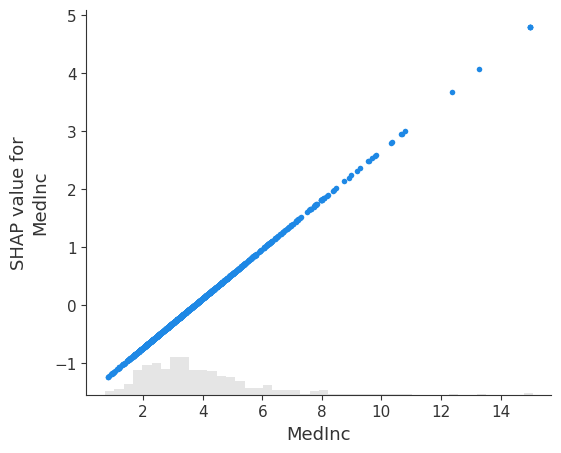

In [ ]:
shap.plots.scatter(shap_values[:, "MedInc"])

### **🛠 Step 7: Visualize Detailed Breakdown of a Single Prediction Using SHAP Waterfall Plot**  
In this step, we create a **SHAP waterfall plot** to visualize the **contribution of each feature** to a specific model prediction. This plot helps us understand how each feature impacts the final prediction for a single instance.

#### 🔍 Explanation  
1. **What is a SHAP Waterfall Plot?**  
   - A **SHAP waterfall plot** shows the breakdown of how **each feature** (e.g., `MedInc`, `AveRooms`) contributes to the final prediction for a single instance.  
   - It starts with the **base value** (usually the average model prediction) and then adds or subtracts each feature’s **SHAP value** to arrive at the **final predicted value** for that instance.

2. **Using `shap.plots.waterfall`**  
   - `shap.plots.waterfall(shap_values[sample_ind], max_display=14)`:  
     - `shap_values[sample_ind]`: The SHAP values for the **specific instance** we are explaining (e.g., sample 20).  
     - `max_display=14`: Limits the number of features shown in the plot to the **top 14** most impactful features.  
     - This plot visually shows the **step-by-step contributions** of each feature to the model's prediction for the chosen instance.

3. **Why Is This Important?**  
   - The waterfall plot helps us **interpret individual predictions**, showing how the model arrived at the predicted value for a specific instance.  
   - It provides transparency into the **decision-making process** of the model, which is crucial for understanding and explaining the model’s behavior to stakeholders.

✅ Run this step to **create a SHAP waterfall plot** for a specific prediction.  

**Command to generate the SHAP waterfall plot:**  


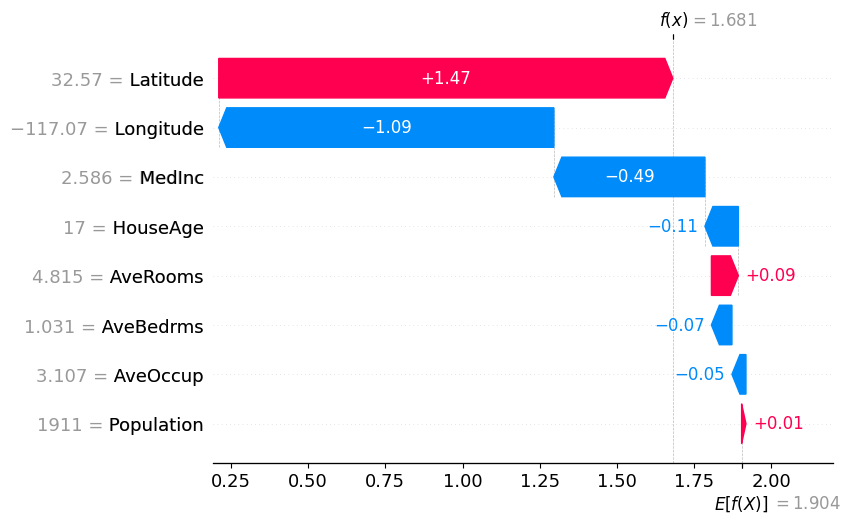

In [ ]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

### **🛠 Step 9: Fit a GAM Model and Explain with SHAP**  
In this step, we fit a **Generalized Additive Model (GAM)** using the **Explainable Boosting Machine (EBM)** from the `interpret` library and explain the model’s predictions using SHAP.

#### 🔍 Explanation  
1. **What is GAM (Generalized Additive Model)?**  
   - A **GAM** is a machine learning model that assumes the target variable can be modeled as a sum of non-linear functions of individual features.  
   - The **Explainable Boosting Machine (EBM)** is a specific type of GAM designed to provide **explainable** predictions while maintaining high accuracy. It is particularly useful when interpretability is critical.

2. **Fitting the EBM Model**  
   - `model_ebm = interpret.glassbox.ExplainableBoostingRegressor(interactions=0)`:  
     - Creates an **Explainable Boosting Regressor** model. The `interactions=0` parameter specifies that there are no interaction terms between features (i.e., we are modeling each feature independently).  
   - `model_ebm.fit(X, y)`:  
     - Fits the **EBM model** on the dataset `X` (input features) and `y` (target variable).

3. **Explaining the EBM Model with SHAP**  
   - `explainer_ebm = shap.Explainer(model_ebm.predict, X100)`:  
     - Creates a SHAP explainer for the **EBM model**. The explainer helps calculate the SHAP values, which measure the impact of each feature on the model’s prediction.  
   - `shap_values_ebm = explainer_ebm(X)`:  
     - Computes the SHAP values for the dataset `X` using the trained EBM model. These values explain the contribution of each feature to each prediction.

4. **Creating a Partial Dependence Plot**  
   - `shap.partial_dependence_plot("MedInc", model_ebm.predict, X100, ...)`:  
     - Creates a **partial dependence plot** to visualize how the feature `"MedInc"` (Median Income) affects the model’s predictions.  
     - The plot shows the **SHAP value** of `"MedInc"` and overlays it with the model's predicted output, indicating how the feature influences the final prediction.

5. **Why Is This Important?**  
   - The **partial dependence plot** helps us understand the **relationship between a feature** (like `"MedInc"`) and the model's predictions.  
   - By overlaying the SHAP values, we can see **how the feature interacts** with other features and its impact on the model's decision-making process.

✅ Run this step to **fit the GAM model (EBM)** and visualize the impact of `"MedInc"` on the predictions using SHAP.  

**Command to fit the model and visualize the effect of `"MedInc"`:**


ExactExplainer explainer: 1001it [00:18, 25.52it/s]                         


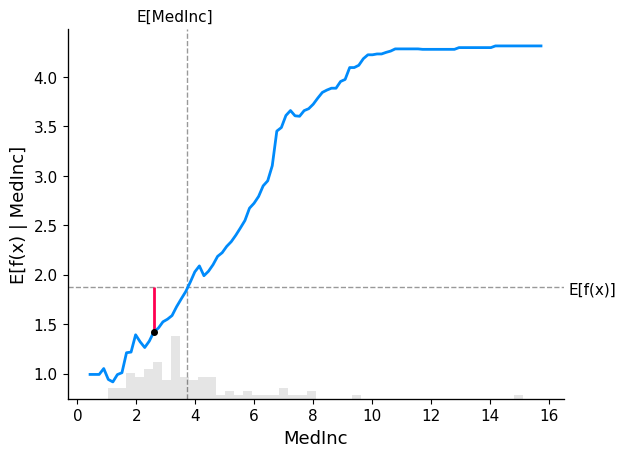

In [ ]:
# fit a GAM model to the data
import interpret.glassbox

model_ebm = interpret.glassbox.ExplainableBoostingRegressor(interactions=0)
model_ebm.fit(X, y)

# explain the GAM model with SHAP
explainer_ebm = shap.Explainer(model_ebm.predict, X100)
shap_values_ebm = explainer_ebm(X)

# make a standard partial dependence plot with a single SHAP value overlaid
fig, ax = shap.partial_dependence_plot(
    "MedInc",
    model_ebm.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    shap_values=shap_values_ebm[sample_ind : sample_ind + 1, :],
)

### **🛠 Step 10: Visualize the SHAP Values for "MedInc" Using a Scatter Plot**  
In this step, we create a **SHAP scatter plot** to visualize the relationship between the feature `"MedInc"` (Median Income) and its corresponding SHAP values. This plot shows how the value of this feature impacts the model’s prediction across all instances.

#### 🔍 Explanation  
1. **What is a SHAP Scatter Plot?**  
   - A **SHAP scatter plot** shows how **SHAP values** are distributed for a particular feature.  
   - The x-axis represents the feature value (e.g., `MedInc`), and the y-axis represents the **SHAP value** (the contribution of that feature to the model's prediction).

2. **Using `shap.plots.scatter`**  
   - `shap.plots.scatter(shap_values_ebm[:, "MedInc"])`:  
     - `shap_values_ebm[:, "MedInc"]`: This extracts the SHAP values for the feature `"MedInc"`.  
     - The scatter plot will show the relationship between the feature’s values and its **SHAP contribution** for all instances in the dataset.  
     - This plot helps us understand the **magnitude** and **direction** of the feature's impact on the model's predictions.

3. **Why Is This Important?**  
   - The **scatter plot** allows us to visually assess how **changes in Median Income (`MedInc`)** affect the model's predictions.  
   - It also helps us detect patterns, outliers, and potential **non-linear relationships** between the feature and the model’s output.

✅ Run this step to **generate the SHAP scatter plot** for `"MedInc"` and visualize its impact on predictions.  

**Command to generate the SHAP scatter plot for "MedInc":**


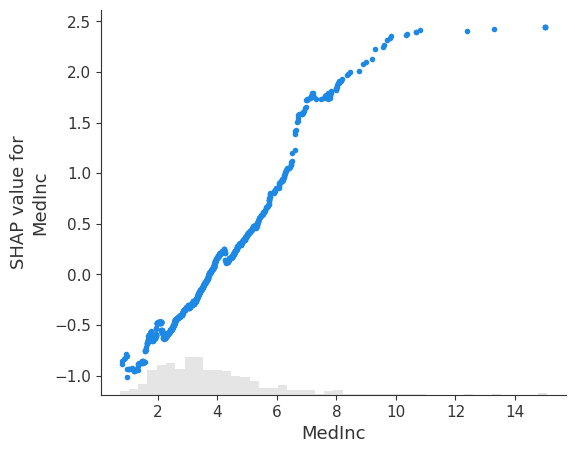

In [ ]:
shap.plots.scatter(shap_values_ebm[:, "MedInc"])

### **🛠 Step 11: Visualize SHAP Values for a Single Prediction Using a Waterfall Plot**  
In this step, we use a **SHAP waterfall plot** to visualize how each feature’s SHAP value contributes to the model's prediction for a single instance.

#### 🔍 Explanation  
1. **What is a SHAP Waterfall Plot?**  
   - A **SHAP waterfall plot** shows how the model's final prediction for a specific instance is built up, starting from the **base value** (expected prediction) and adding or subtracting the **SHAP values** of each feature.  
   - This plot allows us to see **feature-by-feature** how the model's prediction changes for that instance.

2. **Using `shap.plots.waterfall`**  
   - `shap.plots.waterfall(shap_values_ebm[sample_ind])`:  
     - `shap_values_ebm[sample_ind]`: This selects the SHAP values for a specific instance (e.g., `sample_ind`), which corresponds to a particular row in the dataset.  
     - The waterfall plot will show the **step-by-step contribution** of each feature, starting with the **base value** (expected prediction), followed by the incremental SHAP values of the features.  
     - This visualization helps us understand **how each feature** contributes to the final prediction for that instance.

3. **Why Is This Important?**  
   - The **waterfall plot** provides a **transparent** breakdown of the model’s prediction, making it easy to explain why the model predicted a certain outcome for an instance.  
   - This is particularly useful for explaining predictions to non-technical stakeholders, as it shows how individual features impact the result.

✅ Run this step to **create a SHAP waterfall plot** for a specific instance, showing the contribution of each feature to the prediction.  

**Command to generate the SHAP waterfall plot for a specific sample:**


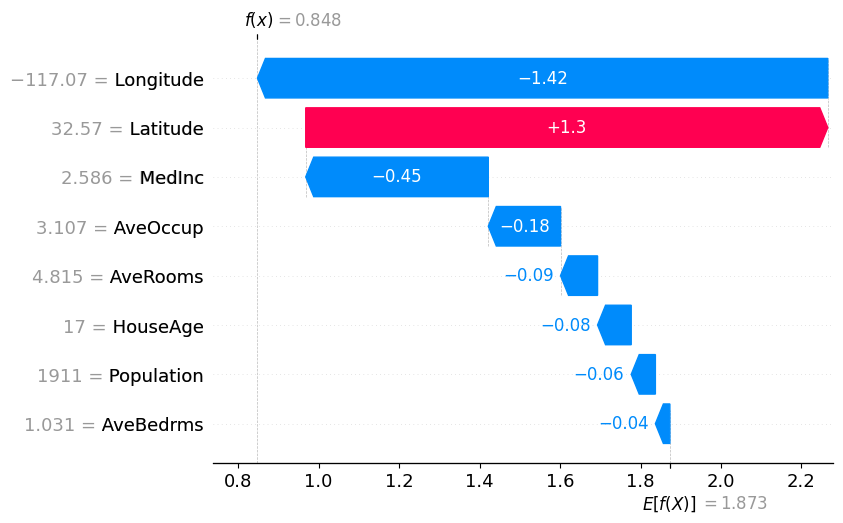

In [ ]:
# the waterfall_plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values_ebm[sample_ind])

### **🛠 Step 12: Visualize Global Feature Importance Using a SHAP Beeswarm Plot**  
In this step, we create a **SHAP beeswarm plot** to visualize the global feature importance and the distribution of SHAP values for all features in the model. This plot gives us an understanding of how features contribute to predictions across the entire dataset.

#### 🔍 Explanation  
1. **What is a SHAP Beeswarm Plot?**  
   - A **SHAP beeswarm plot** visualizes the **distribution of SHAP values** for all features. It shows how the SHAP values (the contributions of each feature to the model's predictions) vary for each feature across the entire dataset.  
   - The beeswarm plot arranges the SHAP values vertically for each feature, making it easy to see both the **magnitude** and **variance** of the feature's impact on predictions.

2. **Using `shap.plots.beeswarm`**  
   - `shap.plots.beeswarm(shap_values_ebm)`:  
     - `shap_values_ebm`: The SHAP values for all instances in the dataset, calculated for the EBM model.  
     - The beeswarm plot will display all features, with each feature's SHAP values arranged on the y-axis. The **color** of the dots typically represents the feature value, with high values in red and low values in blue.

3. **Why Is This Important?**  
   - The **beeswarm plot** helps us identify the **most important features** in the model based on their **average absolute SHAP values**.  
   - It also shows how each feature impacts the predictions and allows us to identify **feature interactions** and **non-linear relationships** between features and model predictions.

✅ Run this step to **generate the SHAP beeswarm plot** and visualize global feature importance.  

**Command to generate the SHAP beeswarm plot:**


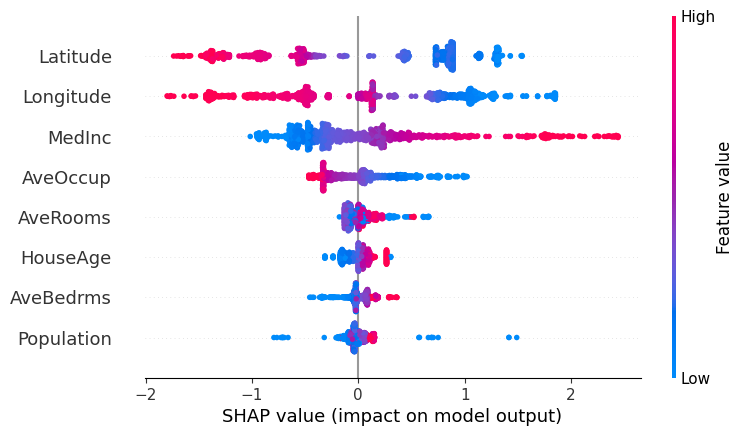

In [ ]:
# the waterfall_plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]
shap.plots.beeswarm(shap_values_ebm)

### **🛠 Step 13: Train an XGBoost Model and Explain with SHAP**  
In this step, we train an **XGBoost model** (a popular gradient boosting model) and explain its predictions using SHAP. We then visualize the effect of the feature `"MedInc"` (Median Income) on the model's predictions using a partial dependence plot.

#### 🔍 Explanation  
1. **What is XGBoost?**  
   - **XGBoost** (Extreme Gradient Boosting) is a powerful and efficient machine learning algorithm that uses **gradient boosting** to make predictions. It is widely used for regression and classification tasks due to its high performance and flexibility.

2. **Training the XGBoost Model**  
   - `model_xgb = xgboost.XGBRegressor(n_estimators=100, max_depth=2).fit(X, y)`:  
     - This line initializes an **XGBoost regressor model** with 100 estimators and a maximum depth of 2 for each tree (a shallow tree).  
     - The model is then trained on the dataset `X` (input features) and `y` (target variable). The goal is to predict house prices based on features like `MedInc` (Median Income), `AveRooms`, and others.

3. **Explaining the XGBoost Model with SHAP**  
   - `explainer_xgb = shap.Explainer(model_xgb, X100)`:  
     - This creates a **SHAP explainer** for the XGBoost model, which will calculate the SHAP values for the model’s predictions.  
     - `X100` is used as the background dataset to compute the SHAP values.
   - `shap_values_xgb = explainer_xgb(X)`:  
     - This calculates the **SHAP values** for all instances in the dataset `X`, explaining the contribution of each feature to the model’s predictions.

4. **Creating a Partial Dependence Plot for "MedInc"**  
   - `shap.partial_dependence_plot("MedInc", model_xgb.predict, X100, ...)`:  
     - This creates a **partial dependence plot** for the feature `"MedInc"`. The plot shows how the model’s prediction changes with different values of **Median Income**, and how the SHAP values (the contribution of the feature) influence the final prediction.
     - We use `shap_values_xgb[sample_ind : sample_ind + 1, :]` to overlay the SHAP values for a specific instance and visualize the impact of `"MedInc"` on that prediction.

5. **Why Is This Important?**  
   - The **partial dependence plot** helps us understand the **relationship** between the feature `"MedInc"` and the model’s prediction.  
   - By using **SHAP values**, we can see how much **Median Income** influences the model’s prediction, helping us interpret the model's behavior and its decision-making process.

✅ Run this step to **train the XGBoost model**, explain its predictions using SHAP, and create a partial dependence plot for `"MedInc"`.  

**Command to train the XGBoost model and visualize the effect of "MedInc":**


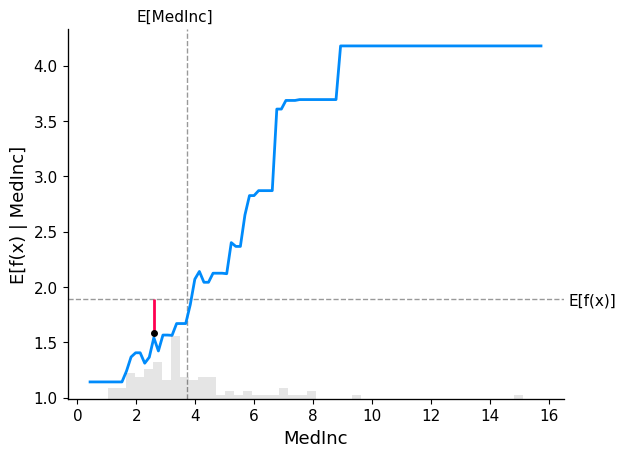

In [ ]:
# train XGBoost model
import xgboost

model_xgb = xgboost.XGBRegressor(n_estimators=100, max_depth=2).fit(X, y)

# explain the GAM model with SHAP
explainer_xgb = shap.Explainer(model_xgb, X100)
shap_values_xgb = explainer_xgb(X)

# make a standard partial dependence plot with a single SHAP value overlaid
fig, ax = shap.partial_dependence_plot(
    "MedInc",
    model_xgb.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    shap_values=shap_values_xgb[sample_ind : sample_ind + 1, :],
)

### **🛠 Step 14: Visualize the SHAP Values for "MedInc" Using a Scatter Plot for XGBoost**  
In this step, we generate a **SHAP scatter plot** to visualize the relationship between the feature `"MedInc"` (Median Income) and its corresponding SHAP values for the XGBoost model.

#### 🔍 Explanation  
1. **What is a SHAP Scatter Plot?**  
   - A **SHAP scatter plot** displays the **SHAP values** of a given feature (in this case, `"MedInc"`) across all instances in the dataset.  
   - The x-axis represents the **feature value** (e.g., `MedInc`), while the y-axis represents the **SHAP value**, showing the feature’s contribution to the model's predictions for each instance.

2. **Using `shap.plots.scatter`**  
   - `shap.plots.scatter(shap_values_xgb[:, "MedInc"])`:  
     - This command generates a scatter plot for the feature `"MedInc"`.  
     - The `shap_values_xgb[:, "MedInc"]` extracts the SHAP values for `"MedInc"`, and the plot will show how the **SHAP values** change with varying values of the `"MedInc"` feature.
     - This helps us visualize whether higher or lower values of **Median Income** contribute more or less to the model’s prediction.

3. **Why Is This Important?**  
   - The scatter plot allows us to visually assess the **magnitude** and **direction** of the impact of `"MedInc"` on the model’s prediction.  
   - It also reveals any potential **non-linear relationships** between the feature and the SHAP values, helping us understand how the model interprets different values of `"MedInc"`.

✅ Run this step to **generate the SHAP scatter plot** for `"MedInc"` and visualize its impact on the XGBoost model’s predictions.  

**Command to generate the SHAP scatter plot for "MedInc":**


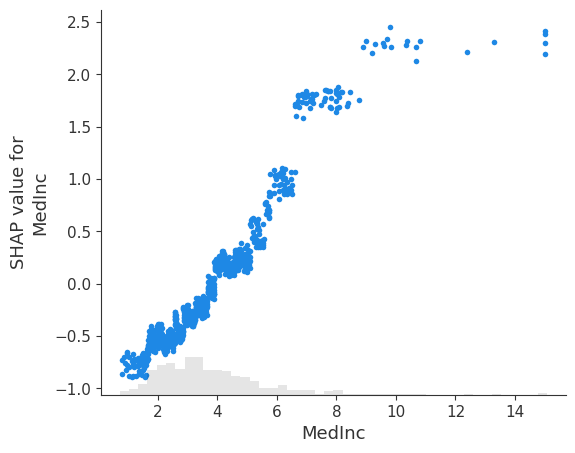

In [ ]:
shap.plots.scatter(shap_values_xgb[:, "MedInc"])

### **🛠 Step 15: Visualize the SHAP Values for "MedInc" with Color Mapping**  
In this step, we modify the previous **SHAP scatter plot** by adding **color mapping** to represent the **magnitude** of the SHAP values for `"MedInc"`. This allows us to better understand the feature's influence on the model's predictions based on the color intensity.

#### 🔍 Explanation  
1. **What is a SHAP Scatter Plot with Color?**  
   - The **SHAP scatter plot with color** not only shows the relationship between the feature value (`"MedInc"`) and its SHAP values but also adds an additional layer of information by coloring the points based on their SHAP values.  
   - The color can help us visually identify areas where **larger** or **smaller** SHAP values occur and how these SHAP values correspond to changes in the feature.

2. **Using `shap.plots.scatter` with Color Mapping**  
   - `shap.plots.scatter(shap_values_xgb[:, "MedInc"], color=shap_values)`:  
     - Here, we plot the SHAP values for `"MedInc"` and use the `color=shap_values` argument to map the **color** of each point based on its **SHAP value**.  
     - The intensity of the color typically represents the magnitude of the SHAP value, which can help us quickly spot patterns or trends, such as whether higher values of `"MedInc"` lead to more positive or negative predictions.

3. **Why Is This Important?**  
   - By adding **color mapping**, we can better interpret the **distribution** of SHAP values across different ranges of `"MedInc"`.  
   - This plot helps us visually assess if certain ranges of `"MedInc"` (e.g., low, medium, high) have stronger or weaker effects on the prediction, providing additional insight into how **features interact with the model’s predictions**.

✅ Run this step to **generate a SHAP scatter plot** for `"MedInc"`, with color mapping showing the magnitude of SHAP values.  

**Command to generate the SHAP scatter plot for "MedInc" with color mapping:**


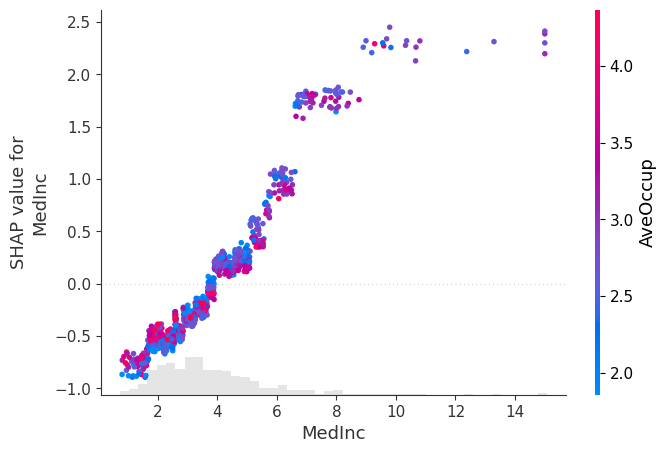

In [ ]:
shap.plots.scatter(shap_values_xgb[:, "MedInc"], color=shap_values)

### **🛠 Step 16: Train a Logistic Regression Model on the Adult Census Dataset**  
In this step, we train a **Logistic Regression** model using the **Adult Census dataset** and define two functions: one for predicting class probabilities and one for calculating log odds. This allows us to explore the behavior of the model and how its predictions are influenced by the input features.

#### 🔍 Explanation  
1. **The Adult Census Dataset**  
   - The **Adult Census dataset** (also known as the "Census Income dataset") contains information about individuals, such as age, education, occupation, and income. The task is to predict whether a person earns more than $50,000 a year based on these features.
   - `X_adult, y_adult = shap.datasets.adult()`:  
     - This loads the **Adult Census dataset** from SHAP’s predefined datasets. `X_adult` contains the features (e.g., age, education, etc.), while `y_adult` contains the target variable, which is whether the individual earns more than $50,000 (binary classification).

2. **Training the Logistic Regression Model**  
   - `model_adult = sklearn.linear_model.LogisticRegression(max_iter=10000)`:  
     - This initializes a **Logistic Regression** model with a maximum of 10,000 iterations for training (to ensure convergence).
   - `model_adult.fit(X_adult, y_adult)`:  
     - This fits the **Logistic Regression** model to the **Adult Census dataset**, learning the relationship between the input features `X_adult` and the target `y_adult`.

3. **Defining Prediction Functions**  
   - `def model_adult_proba(x): return model_adult.predict_proba(x)[:, 1]`:  
     - This function predicts the **class probabilities** for the positive class (income > $50,000) for a given input `x`. It returns the probability of the second class (`[:, 1]`), which corresponds to income > $50,000.
   - `def model_adult_log_odds(x): return model_adult.predict_log_proba(x)[:, 1] - model_adult.predict_log_proba(x)[:, 0]`:  
     - This function computes the **log-odds** of the prediction. The log-odds are the difference between the log probabilities of the two classes: the probability of earning >$50,000 (`[:, 1]`) minus the probability of earning ≤$50,000 (`[:, 0]`).

4. **Why Is This Important?**  
   - Training a **Logistic Regression** model allows us to understand how **features** like age, education, and occupation influence the probability of earning more than $50,000.  
   - The **probability function** and **log-odds** function provide a deeper insight into the model’s decision-making process, especially in binary classification tasks.

✅ Run this step to **train the Logistic Regression model** on the Adult Census dataset and define the functions for probabilities and log-odds.  

**Command to train the Logistic Regression model and define functions:**


In [ ]:
# a classic adult census dataset price dataset
X_adult, y_adult = shap.datasets.adult()

# a simple linear logistic model
model_adult = sklearn.linear_model.LogisticRegression(max_iter=10000)
model_adult.fit(X_adult, y_adult)


def model_adult_proba(x):
    return model_adult.predict_proba(x)[:, 1]


def model_adult_log_odds(x):
    p = model_adult.predict_log_proba(x)
    return p[:, 1] - p[:, 0]

### **🛠 Step 17: Create a Partial Dependence Plot for the "Capital Gain" Feature**  
In this step, we generate a **partial dependence plot** for the feature **"Capital Gain"** using the trained **Logistic Regression model**. This plot will show how changes in the **"Capital Gain"** feature influence the predicted probability of an individual earning more than $50,000.

#### 🔍 Explanation  
1. **What is a Partial Dependence Plot (PDP)?**  
   - A **partial dependence plot (PDP)** visualizes the relationship between a feature (in this case, `"Capital Gain"`) and the predicted outcome of the model.  
   - The plot shows how the model’s predictions change as we vary the value of a specific feature while keeping all other features constant.

2. **Using `shap.partial_dependence_plot`**  
   - `sample_ind = 18`:  
     - We specify the sample index (`18`) to represent a specific instance in the dataset, though the PDP will generally display trends over the entire dataset.
   - `fig, ax = shap.partial_dependence_plot("Capital Gain", model_adult_proba, X_adult, model_expected_value=True, feature_expected_value=True, show=False, ice=False)`:  
     - This function call creates the **partial dependence plot** for the feature `"Capital Gain"`.  
     - `model_adult_proba` is used as the prediction function, which outputs the predicted probability of earning more than $50,000.  
     - `model_expected_value=True` and `feature_expected_value=True` help in showing the **expected value** of the model’s prediction and the expected value for the feature.
     - `ice=False`: This disables individual conditional expectation plots (ICE plots) and focuses on the overall partial dependence.

3. **Why Is This Important?**  
   - The **PDP for Capital Gain** helps us understand how the **"Capital Gain"** feature influences the probability of an individual earning more than $50,000.  
   - The plot can reveal trends such as whether **higher capital gains** increase the likelihood of earning more than $50,000, or if the relationship is non-linear.

✅ Run this step to **generate the partial dependence plot** for the `"Capital Gain"` feature and visualize its impact on the model’s predictions.

**Command to generate the Partial Dependence Plot:**


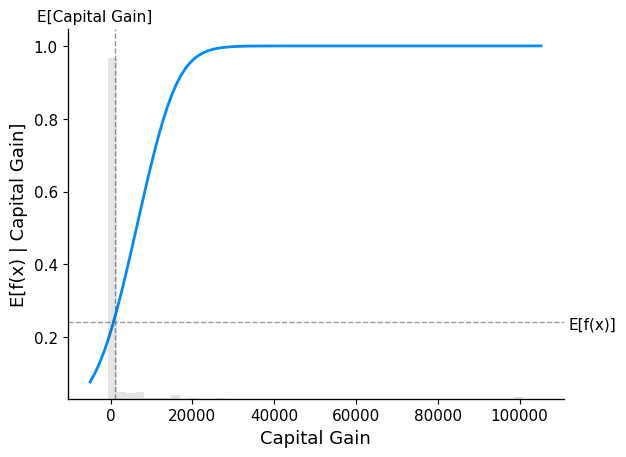

In [ ]:
# make a standard partial dependence plot
sample_ind = 18
fig, ax = shap.partial_dependence_plot(
    "Capital Gain",
    model_adult_proba,
    X_adult,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
)

### **🛠 Step 18: Compute SHAP Values for the Logistic Regression Model on the Adult Census Dataset**  
In this step, we compute the **SHAP values** for the **Logistic Regression model** trained on the **Adult Census dataset**. SHAP values explain the contribution of each feature to the model's predictions for a specific instance.

#### 🔍 Explanation  
1. **What are SHAP Values?**  
   - **SHAP values** (SHapley Additive exPlanations) quantify the impact of each feature on the model’s output.  
   - They provide a fair and consistent explanation by breaking down the prediction for each instance into the contributions of individual features, ensuring the sum of all feature contributions equals the final prediction.

2. **Using `shap.Explainer` with a Background Dataset**  
   - `background_adult = shap.maskers.Independent(X_adult, max_samples=100)`:  
     - Here, we create a **background dataset** for SHAP using `shap.maskers.Independent`. The background dataset is a random sample of 100 instances from `X_adult` that will be used to calculate the SHAP values.  
     - **Why background data?** The background dataset represents "neutral" data, helping SHAP to calculate how much each feature changes the model's predictions compared to a typical scenario.

3. **Computing SHAP Values for the Logistic Regression Model**  
   - `explainer = shap.Explainer(model_adult_proba, background_adult)`:  
     - We initialize the **SHAP explainer** for the **Logistic Regression model**, using the `model_adult_proba` function (probability prediction).  
     - We also pass the background dataset `background_adult` to help compute the SHAP values in a consistent context.
   - `shap_values_adult = explainer(X_adult[:1000])`:  
     - This computes the **SHAP values** for the first 1000 instances in the `X_adult` dataset. These values represent the contributions of each feature to the model’s prediction for each instance.

4. **Why Is This Important?**  
   - **SHAP values** provide deep insight into how individual features (such as age, education, etc.) influence the model’s predictions.  
   - By computing SHAP values, we can better interpret the model's decision-making process and explain why the model makes certain predictions for specific instances.

✅ Run this step to **compute SHAP values** for the Logistic Regression model on the Adult Census dataset.

**Command to compute SHAP values:**


In [ ]:
# compute the SHAP values for the linear model
background_adult = shap.maskers.Independent(X_adult, max_samples=100)
explainer = shap.Explainer(model_adult_proba, background_adult)
shap_values_adult = explainer(X_adult[:1000])

PermutationExplainer explainer: 1001it [01:06, 13.17it/s]


### **🛠 Step 19: Visualize SHAP Values for the "Age" Feature**  
In this step, we create a **scatter plot** of the SHAP values for the feature **"Age"** to understand how the age of individuals in the dataset influences the model’s predictions.

#### 🔍 Explanation  
- `shap.plots.scatter(shap_values_adult[:, "Age"])`:  
  - This command generates a **scatter plot** showing the relationship between the SHAP values and the "Age" feature.  
  - Each point represents the SHAP value for a specific instance in the dataset, with the `x-axis` representing the "Age" feature and the `y-axis` showing the SHAP values.  
  - This plot helps us understand how the **"Age"** feature affects the model’s prediction of whether an individual earns more than $50,000.

✅ Run this code to **visualize the SHAP values** for the "Age" feature and understand its impact on the model’s predictions.

**Command to create the scatter plot:**


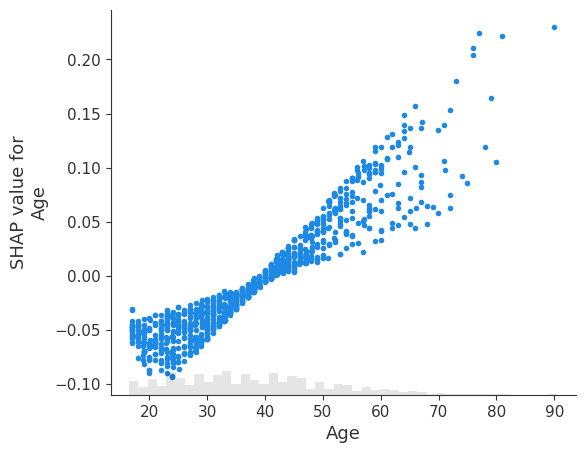

In [ ]:
shap.plots.scatter(shap_values_adult[:, "Age"])

### **🛠 Step 20: Compute SHAP Values for the Log-Odds of the Logistic Regression Model**  
In this step, we compute the **SHAP values** for the **log-odds** (logarithmic probability) of the **Logistic Regression model** trained on the **Adult Census dataset**.

#### 🔍 Explanation  
1. **What are Log-Odds in Logistic Regression?**  
   - **Log-odds** are the logarithmic transformation of the probability that an individual earns more than $50,000, relative to the probability of earning less than $50,000.
   - Logistic regression outputs probabilities, but in some cases, it's useful to look at the **log-odds**, which can provide a more interpretable scale for explaining feature contributions.

2. **Using `shap.Explainer` for Log-Odds**  
   - `explainer_log_odds = shap.Explainer(model_adult_log_odds, background_adult)`:  
     - We initialize the **SHAP explainer** for the **log-odds** prediction function, `model_adult_log_odds`, which returns the log-odds rather than the probability.  
     - The `background_adult` dataset is used to compute the SHAP values in context, helping us understand feature contributions for the log-odds.
   - `shap_values_adult_log_odds = explainer_log_odds(X_adult[:1000])`:  
     - This computes the **SHAP values** for the first 1000 instances of the `X_adult` dataset, but using the **log-odds** prediction function.

3. **Why Is This Important?**  
   - By analyzing **log-odds**, we gain insight into how the features influence the model’s decision-making in terms of odds rather than probabilities.  
   - This can be particularly useful when interpreting models that deal with **binary outcomes** (e.g., earning more or less than $50,000).

✅ Run this step to **compute SHAP values** for the log-odds of the Logistic Regression model on the Adult Census dataset.

**Command to compute SHAP values for log-odds:**


In [ ]:
# compute the SHAP values for the linear model
explainer_log_odds = shap.Explainer(model_adult_log_odds, background_adult)
shap_values_adult_log_odds = explainer_log_odds(X_adult[:1000])

PermutationExplainer explainer: 1001it [01:02, 13.43it/s]


### **🛠 Step 21: Visualize SHAP Values for the "Age" Feature in Log-Odds**  
In this step, we create a **scatter plot** of the SHAP values for the **"Age"** feature, specifically in the context of the **log-odds** of the Logistic Regression model.

#### 🔍 Explanation  
- `shap.plots.scatter(shap_values_adult_log_odds[:, "Age"])`:  
  - This command generates a **scatter plot** showing the relationship between the SHAP values and the "Age" feature, but in terms of **log-odds**.  
  - The `x-axis` represents the **"Age"** feature, while the `y-axis` shows the corresponding SHAP values for each individual in the dataset.  
  - This visualization helps us understand how the **"Age"** feature affects the log-odds (the odds ratio) of predicting whether an individual earns more than $50,000.

✅ Run this code to **visualize the SHAP values** for the "Age" feature in the context of log-odds and explore its impact on the model’s prediction.

**Command to create the scatter plot for log-odds:**


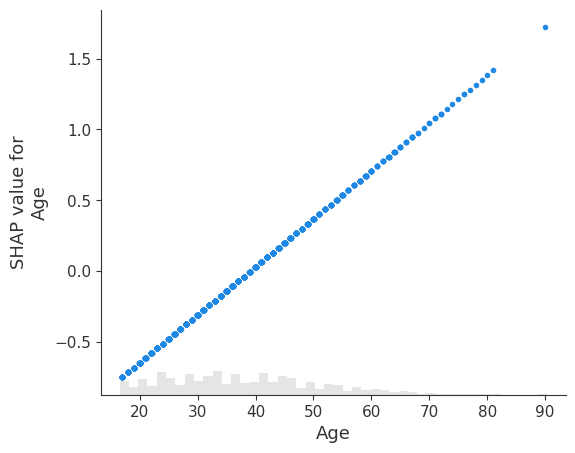

In [ ]:
shap.plots.scatter(shap_values_adult_log_odds[:, "Age"])

### **🛠 Step 22: Make a Partial Dependence Plot for the "Age" Feature in Log-Odds**  
In this step, we generate a **partial dependence plot (PDP)** to visualize the relationship between the **"Age"** feature and the model’s **log-odds** predictions.

#### 🔍 Explanation  
- `shap.partial_dependence_plot(...)`:  
  - This function generates a **partial dependence plot** for the **"Age"** feature using the **log-odds** predictions from the Logistic Regression model.
  - The `x-axis` represents the "Age" feature, while the `y-axis` shows the change in **log-odds** as the "Age" feature varies.
  - `model_expected_value=True`: This includes the expected value of the model, providing a baseline reference point.  
  - `feature_expected_value=True`: This adds the expected value for the "Age" feature, helping us understand its average contribution across all instances.  
  - `ice=False`: This option disables the Individual Conditional Expectation (ICE) curves, which would show how predictions change for individual data points.

✅ Run this code to **generate a partial dependence plot** for the "Age" feature and understand its effect on the model's log-odds predictions.

**Command to create the partial dependence plot:**


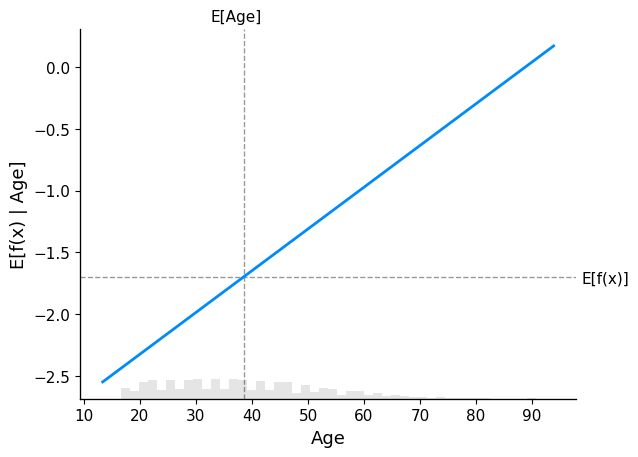

In [ ]:
# make a standard partial dependence plot
sample_ind = 18
fig, ax = shap.partial_dependence_plot(
    "Age",
    model_adult_log_odds,
    X_adult,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
)

### **🛠 Step 23: Train an XGBoost Model for Classification**  
In this step, we train an **XGBoost classifier** on the **Adult Census dataset** to predict whether an individual earns more than $50,000.

#### 🔍 Explanation  
1. **Importing XGBoost**:  
   - `import xgboost`: We import the **XGBoost library**, a popular machine learning library used for classification and regression tasks, known for its efficiency and high performance.

2. **Initializing the XGBoost Classifier**:  
   - `model = xgboost.XGBClassifier(n_estimators=100, max_depth=2)`:  
     - We initialize an **XGBoost classifier** with the following parameters:
       - `n_estimators=100`: The model will use 100 boosting rounds (trees) to make predictions.
       - `max_depth=2`: This limits the depth of each tree to 2, which helps in preventing overfitting.
   
3. **Setting the Evaluation Metric**:  
   - `model.set_params(eval_metric="logloss")`:  
     - We set the evaluation metric to **log loss** (`logloss`), a commonly used metric for classification problems that measures the accuracy of probabilistic predictions. Lower log loss indicates better performance.
   
4. **Training the Model**:  
   - `model.fit(X_adult, y_adult)`:  
     - This trains the **XGBoost classifier** on the **Adult Census dataset** (`X_adult` for features and `y_adult` for labels).
     - Notice that we do not pass the `eval_metric` inside the `.fit()` function, as it's already set via `model.set_params()`.

✅ Run this code to **train an XGBoost model** and evaluate its performance using the log-loss metric.

**Command to train the XGBoost classifier:**


In [ ]:
import xgboost
import shap

# Initialize the XGBoost classifier
model = xgboost.XGBClassifier(n_estimators=100, max_depth=2)

# Set evaluation metric before training
model.set_params(eval_metric="logloss")

# Train model (do NOT pass eval_metric inside .fit())
model.fit(X_adult, y_adult)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

### **🛠 Step 24: Train XGBoost and Retrieve Evaluation Results**  

#### 🔍 Explanation  
- **evals_result**: Initializes a dictionary to store evaluation results.  
- **Training**: We train the model using the `eval_set` to track performance and retrieve evaluation metrics.

✅ Run the code to train the model and capture evaluation results.

**Command:**


In [ ]:
evals_result = {}  # Initialize dictionary

# Train the model correctly
model.fit(X_adult, y_adult, eval_set=[(X_adult, y_adult)], verbose=False)

# Retrieve evaluation results after training
evals_result = model.evals_result()



### **🛠 Step 25: Visualize SHAP Values with a Bar Plot**  

#### 🔍 Explanation  
- `shap.plots.bar(shap_values)`: This command generates a **bar plot** that shows the average **absolute SHAP values** for each feature. The plot helps us understand which features have the most influence on the model's predictions.

✅ Run this code to **visualize feature importance** with a bar plot of SHAP values.

**Command:**


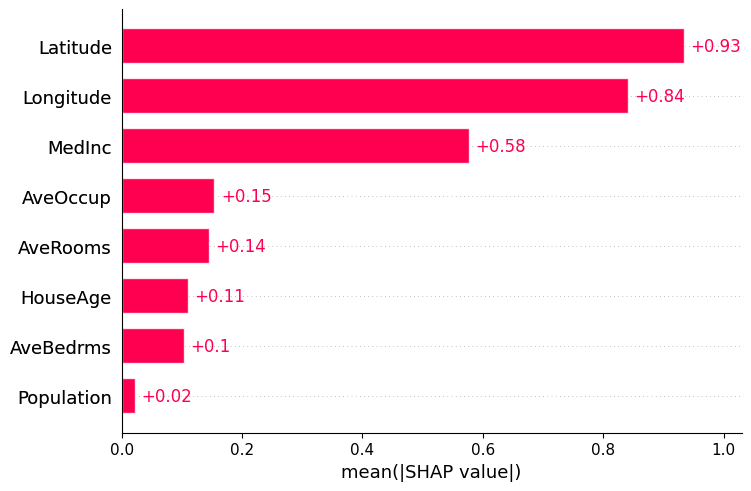

In [ ]:
shap.plots.bar(shap_values)

### **🛠 Step 26: Visualize Maximum Absolute SHAP Values with a Bar Plot**  

#### 🔍 Explanation  
- `shap.plots.bar(shap_values.abs.max(0))`:  
  - This command creates a **bar plot** that shows the maximum **absolute SHAP values** for each feature across all samples.  
  - The `abs.max(0)` operation finds the largest absolute SHAP value for each feature, helping us identify the most influential features at their peak impact.

✅ Run this code to **visualize the maximum feature influence** using SHAP values.

**Command:**


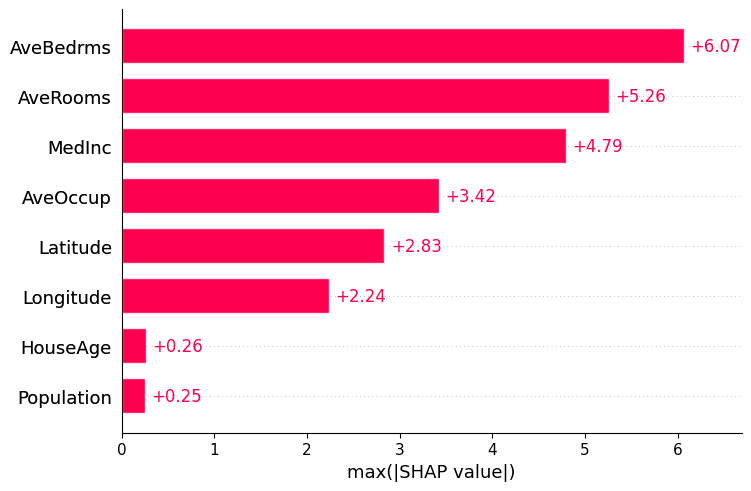

In [ ]:
shap.plots.bar(shap_values.abs.max(0))

### **🛠 Step 27: Visualize SHAP Values with a Beeswarm Plot**  

#### 🔍 Explanation  
- `shap.plots.beeswarm(shap_values)`:  
  - This creates a **beeswarm plot**, which visualizes the distribution of **SHAP values** for each feature.  
  - Each point represents the SHAP value for a feature in a particular sample, and the color indicates the feature's value. This plot helps identify how each feature contributes to model predictions across different samples.

✅ Run this code to **visualize the SHAP values** for all features and observe their distribution.

**Command:**


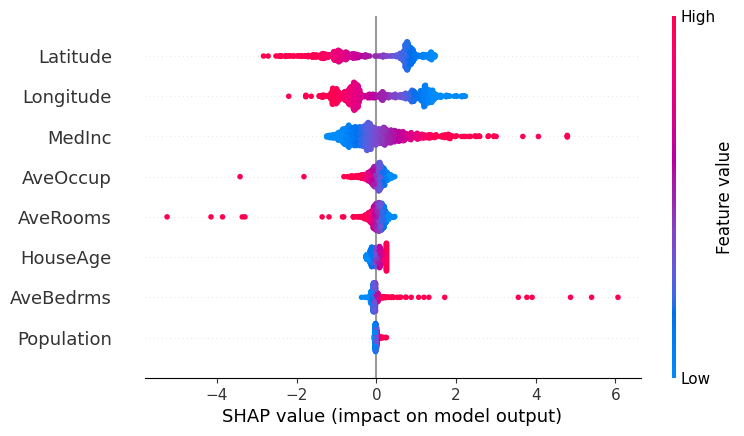

In [ ]:
shap.plots.beeswarm(shap_values)

### **🛠 Step 28: Visualize Absolute SHAP Values with a Custom Beeswarm Plot**  

#### 🔍 Explanation  
- `shap.plots.beeswarm(shap_values.abs, color="shap_red")`:  
  - This command creates a **beeswarm plot** displaying the **absolute SHAP values** of each feature.
  - The `color="shap_red"` option customizes the color of the plot to red, providing a more distinct visualization of feature impacts.  
  - The absolute SHAP values show the magnitude of influence each feature has on predictions, regardless of whether the influence is positive or negative.

✅ Run this code to **visualize absolute SHAP values** with customized colors.

**Command:**


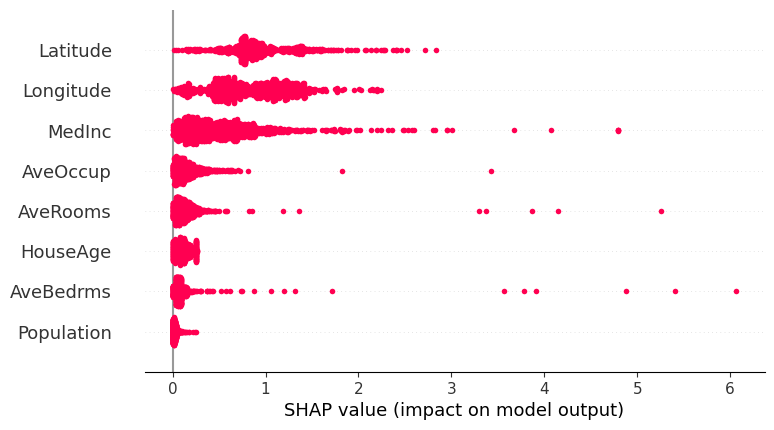

In [ ]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")

### **🛠 Step 29: Visualize SHAP Values with a Heatmap**  

#### 🔍 Explanation  
- `shap.plots.heatmap(shap_values[:1000])`:  
  - This generates a **heatmap** of SHAP values for the first 1000 samples.  
  - Each row represents a sample, and each column represents a feature. The color intensity indicates the magnitude of the SHAP value for that feature in the corresponding sample, helping us understand the relationship between features and model predictions across multiple samples.

✅ Run this code to **visualize SHAP values** using a heatmap for better comparison across samples and features.

**Command:**


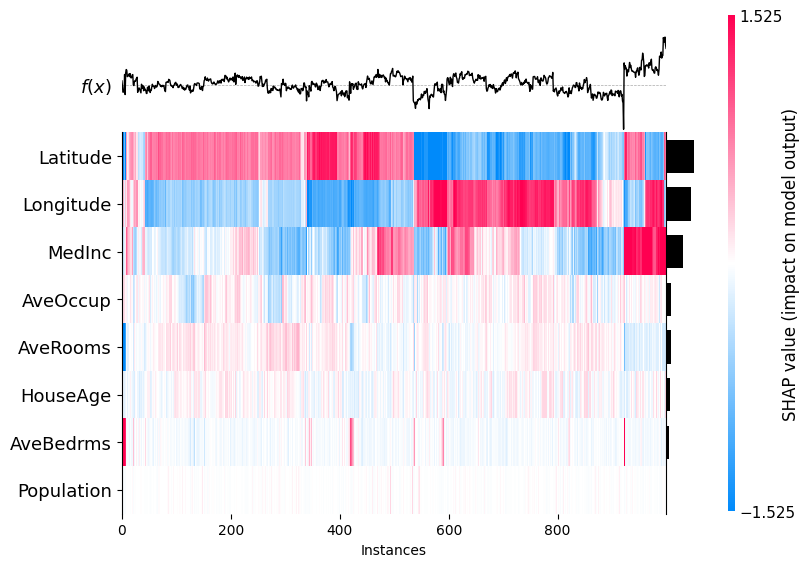

<Axes: xlabel='Instances'>

In [ ]:
shap.plots.heatmap(shap_values[:1000])

### **🛠 Step 30: Visualize SHAP Values for the "Age" Feature with a Scatter Plot**  

#### 🔍 Explanation  
- `shap.plots.scatter(shap_values[:, X_adult.columns.get_loc("Age")])`:  
  - This command generates a **scatter plot** showing the SHAP values specifically for the "Age" feature.  
  - The plot illustrates the relationship between the "Age" feature and the SHAP values across all samples. Each point represents the impact of "Age" on the model's prediction for a specific sample. The scatter plot helps to visualize how different age values affect the model’s output.

✅ Run this code to **visualize the SHAP values** for the "Age" feature.

**Command:**


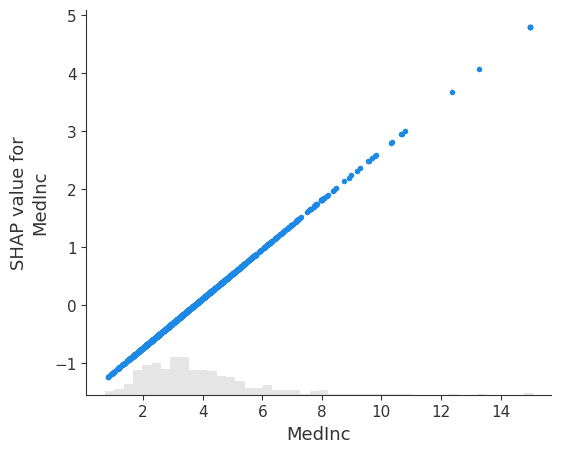

In [ ]:
shap.plots.scatter(shap_values[:, X_adult.columns.get_loc("Age")])



### **🛠 Step 31: Check Feature Names and Visualize SHAP Values for "Age"**  

#### 🔍 Explanation  
1. **Check Feature Names in SHAP**:  
   - `shap_values.feature_names`: We first check if SHAP has provided feature names. This ensures that the correct feature names are used for further analysis.  
   
2. **Use Feature Names from `X_adult`**:  
   - If SHAP does not provide feature names, we use the column names from `X_adult` as a fallback (`X_adult.columns.tolist()`).
   
3. **Visualize SHAP Values for "Age"**:  
   - We then check if the "Age" feature is present in the list of feature names. If found, we extract its index and use it to plot the SHAP values for the "Age" feature specifically.
   
4. **Error Handling**:  
   - If "Age" is not found in the feature names, a message is printed listing the available features.

✅ Run this code to **check feature names** and **visualize SHAP values** for "Age".

**Command:**


In [ ]:
# Check feature names
print("Feature names in SHAP:", shap_values.feature_names)

# Use feature names from X_adult if SHAP doesn't provide them
feature_names = shap_values.feature_names if shap_values.feature_names else X_adult.columns.tolist()

# Ensure "Age" is in feature_names
if "Age" in feature_names:
    age_index = feature_names.index("Age")
    shap.plots.scatter(shap_values[:, age_index])
else:
    print("Feature 'Age' not found. Available features:", feature_names)


Feature names in SHAP: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Feature 'Age' not found. Available features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


### **🛠 Step 32: Check Feature Names and Visualize SHAP Values for "Relationship"**  

#### 🔍 Explanation  
1. **Check Feature Names in SHAP**:  
   - `shap_values.feature_names`: We print out the feature names that SHAP has recognized to ensure the "Relationship" feature is included.

2. **Visualize SHAP Values for "Relationship"**:  
   - If the "Relationship" feature is present, we find its index in the feature names and plot the SHAP values for that feature using a **scatter plot**. The `color=shap_values` option adds color based on the SHAP values to better understand the impact of "Relationship" on predictions.

3. **Error Handling**:  
   - If the "Relationship" feature is not present, we print the available features to help identify any issues.

✅ Run this code to **check feature names** and **visualize SHAP values** for "Relationship".

**Command:**


In [ ]:
# Check feature names
print(shap_values.feature_names)

# Ensure "Relationship" is a valid feature name
if "Relationship" in shap_values.feature_names:
    feature_index = shap_values.feature_names.index("Relationship")  # Get column index
    shap.plots.scatter(shap_values[:, feature_index], color=shap_values)
else:
    print("Feature 'Relationship' not found. Available features:", shap_values.feature_names)


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Feature 'Relationship' not found. Available features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


### **🛠 Step 33: Cluster Data Using Hierarchical Clustering**  

#### 🔍 Explanation  
- `shap.utils.hclust(X_adult, y_adult)`:  
  - This function performs **hierarchical clustering** on the data (`X_adult`) and the target labels (`y_adult`).  
  - Hierarchical clustering groups similar data points together, allowing us to identify patterns and relationships within the data. It helps us understand how different samples relate to each other based on their feature values.

✅ Run this code to **perform hierarchical clustering** on the dataset.

**Command:**


In [ ]:
clustering = shap.utils.hclust(X_adult, y_adult)

### **🛠 Step 34: Cluster Data and Visualize with SHAP Bar Plot**  

#### 🔍 Explanation  
1. **Check Number of Features in `X_adult` and `shap_values`**:  
   - The command `print("X_adult shape:", X_adult.shape)` checks the shape of the input features `X_adult`, while `print("SHAP values shape:", shap_values.shape)` verifies the shape of the SHAP values. This ensures that the dimensions match, and the features are aligned between the dataset and SHAP values.

2. **Cluster Based on Available Features**:  
   - The clustering step uses `X_adult.iloc[:, :shap_values.shape[1]]`, which ensures that the clustering is performed only on the available features in `X_adult` that match the number of SHAP values computed.

3. **Generate SHAP Bar Plot with Clustering**:  
   - The `shap.plots.bar(shap_values, clustering=clustering)` command generates a **bar plot** of the SHAP values, organized according to the clustering structure. The clustering groups features based on their similarity, which helps in better visualizing how different groups of features impact the model's predictions.

✅ Run this code to **check feature shapes**, **cluster data**, and **visualize the SHAP bar plot** with the clustering structure.

**Command:**


X_adult shape: (32561, 12)
SHAP values shape: (1000, 8)


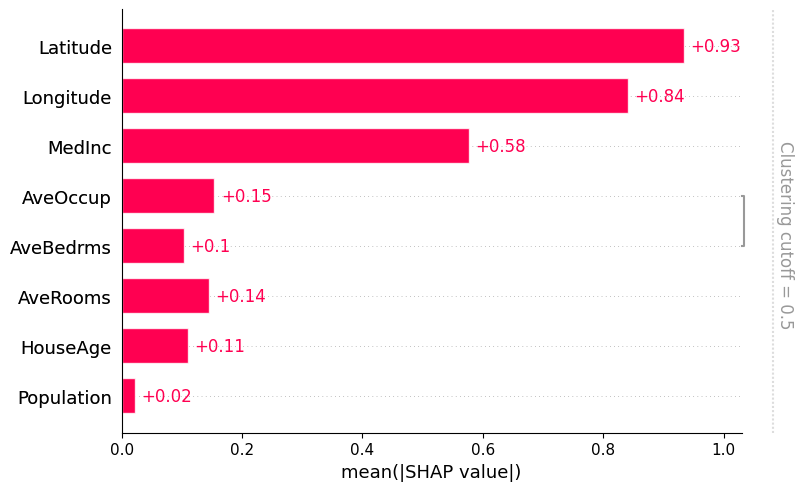

In [ ]:
# Check number of features in X_adult and shap_values
print("X_adult shape:", X_adult.shape)
print("SHAP values shape:", shap_values.shape)

# Ensure clustering is computed only on available features
clustering = shap.utils.hclust(X_adult.iloc[:, :shap_values.shape[1]], y_adult)

# Generate SHAP bar plot with the correct clustering structure
shap.plots.bar(shap_values, clustering=clustering)


### **🛠 Step 35: Customize SHAP Bar Plot with Clustering Cutoff**  

#### 🔍 Explanation  
- `shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=0.8)`:  
  - This command generates a **SHAP bar plot** with the clustering structure applied, just like the previous step.  
  - The addition of `clustering_cutoff=0.8` applies a **cutoff threshold** to the clustering structure. It means that features with a clustering similarity above 80% (0.8) will be grouped together in the plot, helping to visually highlight stronger relationships between features.
  - This helps in reducing clutter and focusing on the most significant feature groups.

✅ Run this code to **visualize the SHAP bar plot** with a clustering cutoff at 0.8.

**Command:**


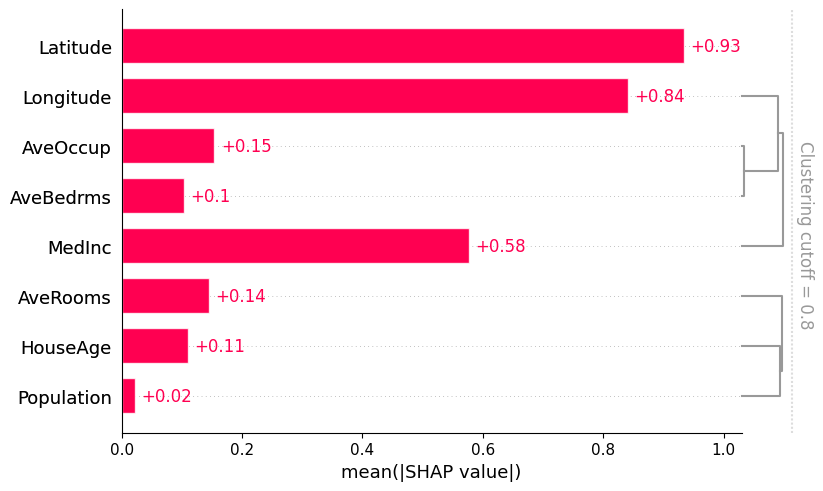

In [ ]:
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=0.8)

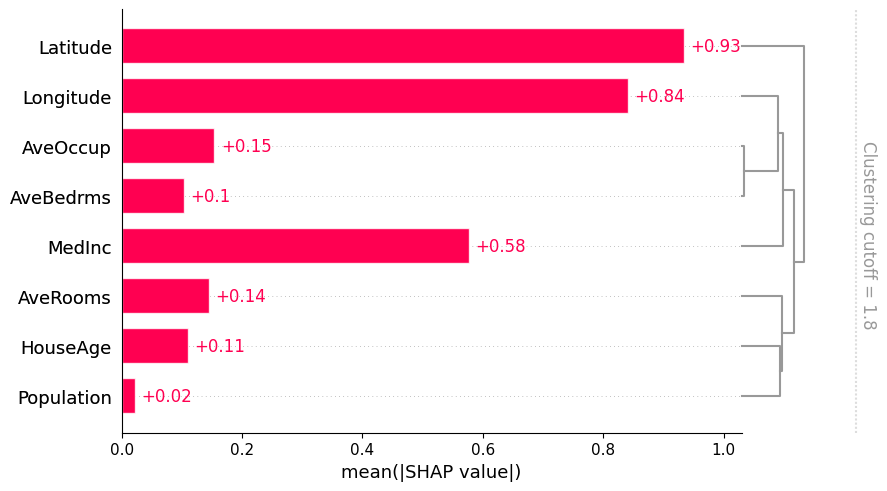

In [ ]:
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=1.8)

### **🛠 Step 37: Explaining a Transformers NLP Model with SHAP**

#### 🔍 Explanation
1. **Setup and Load Pre-trained Model**:  
   - The **`DistilBertTokenizerFast`** and **`DistilBertForSequenceClassification`** are used to load a pre-trained model for sentiment analysis from the **SST-2** dataset.

2. **Prediction Function**:  
   - A prediction function (`f(x)`) is defined, which tokenizes input text, processes it through the model, and computes logit scores.

3. **SHAP Explainer**:  
   - The SHAP explainer is initialized with the function and tokenizer, specifying the **device** as **CPU**. It explains how the model makes its predictions on a small batch of text.

#### ⏳ **Note**:  
- This step involves loading the model and running SHAP on a batch of text data, which might take **around 30 minutes** to complete, depending on the environment and available resources.

✅ **Run this code to explain the model predictions on a sample batch of IMDb data.**


In [ ]:
import shap
import torch
import numpy as np
import scipy as sp
import transformers
import datasets

# Load the tokenizer and model
tokenizer = transformers.DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
model = transformers.DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased-finetuned-sst-2-english"
)  # Removed .cuda()

# Define a prediction function that runs on CPU
def f(x):
    encoded_inputs = [tokenizer.encode(v, padding="max_length", max_length=500, truncation=True) for v in x]
    tv = torch.tensor(encoded_inputs)  # Convert list to tensor
    outputs = model(tv)[0].detach().numpy()  # Ensure it stays on CPU
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    return sp.special.logit(scores[:, 1])  # Use one-vs-rest logit units

# Build the SHAP explainer using CPU
explainer = shap.Explainer(f, tokenizer, device="cpu")

# Load dataset
imdb_train = datasets.load_dataset("imdb")["train"]

# Explain model predictions on a small batch
shap_values = explainer(imdb_train[:10], fixed_context=1, batch_size=2)

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 3it [14:39, 208.59s/it]              

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 4it [18:18, 213.19s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 5it [23:25, 248.05s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 6it [30:18, 305.49s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 7it [34:32, 288.29s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 8it [38:26, 270.89s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 9it [45:20, 315.87s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (720 > 512). Running this sequence through the model will result in indexing errors


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 10it [52:13, 346.03s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 11it [59:03, 354.34s/it]


### **🛠 Step 38: Visualizing SHAP Explanation for a Sentence**

#### 🔍 Explanation
- In this step, we visualize the SHAP values for a particular sentence in the dataset. The **`shap.plots.text()`** function is used to generate a text-based explanation that shows how each word in the sentence contributed to the model's decision.

- The SHAP values for this sentence are visualized using a color-coded display, where the color intensity reflects the magnitude of the contribution of each word. Positive contributions (helping the model make a positive prediction) are highlighted in one color, and negative contributions (helping the model make a negative prediction) are highlighted in another.

#### ⏳ **Note**:  
- This visualization provides an interpretability breakdown for individual words in the sentence and will help you understand the reasoning behind the model's classification decision.

✅ **Run this code to generate a textual SHAP plot for a sentence in the dataset.**


In [ ]:
# plot a sentence's explanation
shap.plots.text(shap_values[2])

### **🛠 Step 39: Visualizing the Mean Absolute SHAP Values with a Bar Plot**

#### 🔍 Explanation
- In this step, we generate a **bar plot** that displays the **mean absolute SHAP values** for all features (words, in the case of text data). This plot helps us understand which features have the largest overall impact on the model's predictions.
  
- **`shap_values.abs.mean(0)`** calculates the mean absolute SHAP value for each feature across the dataset. The absolute values are used because they highlight the magnitude of each feature's impact, irrespective of whether the feature contributes positively or negatively.

- The resulting **bar plot** will show the most influential features, helping you identify which words or tokens are most critical in the model's decision-making process.

#### ⏳ **Note**:  
- This step provides a high-level overview of which features (words) are most influential for the model across all data, offering a global interpretability view.

✅ **Run this code to generate a bar plot of the mean absolute SHAP values for the features.**


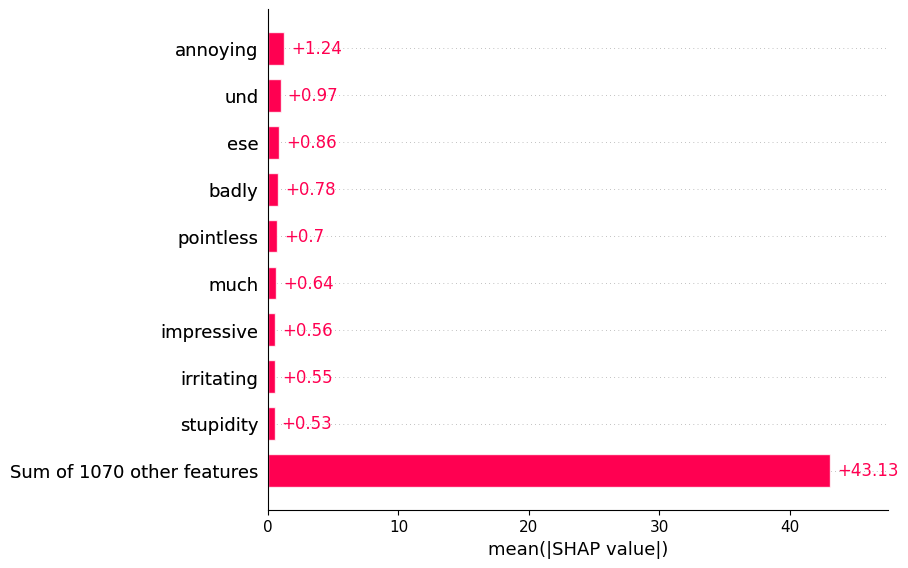

In [ ]:
shap.plots.bar(shap_values.abs.mean(0))

### **🛠 Step 40: Visualizing the Total Impact of Features with a Bar Plot**

#### 🔍 Explanation
- In this step, we generate a **bar plot** to display the **total SHAP values** for each feature. The **`shap_values.abs.sum(0)`** computes the sum of the absolute SHAP values for each feature, showing the total contribution of each feature to the model’s predictions across all instances.

- This gives us a sense of the **cumulative impact** each feature has on the model's predictions. A feature with a high total SHAP value has had a significant impact on the model’s output across the entire dataset, either positively or negatively.

- The **bar plot** helps us understand the global feature importance based on the total contribution over all predictions.

#### ⏳ **Note**:  
- This step highlights the **total influence** of features across the dataset, which is useful for understanding which features have the most substantial effect on the model's output.

✅ **Run this code to generate a bar plot of the total absolute SHAP values for the features.**


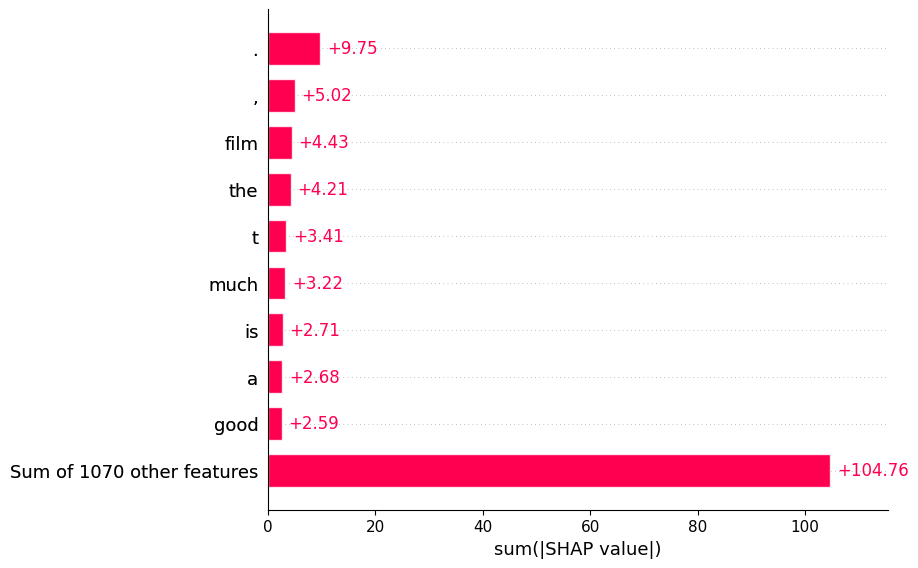

In [ ]:
shap.plots.bar(shap_values.abs.sum(0))

### **📝 Summary: What You Will Notice After Performing the Lab**

#### 🔍 Key Insights
After completing this lab, you will gain a deep understanding of **model interpretability** and how to use **SHAP** (SHapley Additive exPlanations) to explain machine learning model predictions. Specifically, you will notice:

1. **Model Transparency**: You will be able to break down complex model decisions and understand how specific features (e.g., words in text, attributes in tabular data) contribute to a model's output.
   
2. **Feature Importance**: Through various SHAP visualizations, like **scatter plots**, **bar plots**, and **partial dependence plots**, you’ll observe which features have the most significant impact on the model's predictions. This helps in identifying key drivers behind the model's behavior.

3. **Local and Global Interpretability**:
    - **Local Interpretability**: You’ll learn how to interpret the model's decisions for specific instances or data points (e.g., individual sentences or data rows).
    - **Global Interpretability**: You’ll also see how to understand the overall behavior of the model across the entire dataset, such as identifying which features are globally important or have the greatest cumulative effect.

4. **Model Comparison**: By applying SHAP to different models (e.g., linear regression, GAM, XGBoost, and transformers), you'll compare their behavior and see how different model types interpret the same data.

5. **Real-World Applications**: This lab will help you understand how explainability methods like SHAP can be used in real-world applications such as text classification, image recognition, and regression tasks, making AI models more transparent and trustable.

#### 🛠 **Hands-On Tools & Visualizations**:
- **SHAP Plots**: You'll learn how to generate and interpret various SHAP plots, such as:
    - **Scatter Plots**: To visualize feature contributions for specific data points.
    - **Bar Plots**: To compare the total or mean SHAP values across features.
    - **Waterfall Plots**: To understand how different features contribute to a specific prediction.
    - **Beeswarm & Heatmaps**: To visualize the spread and distribution of SHAP values across multiple features.

#### 🧠 **Reflection**:
- **Impact of Features**: You will gain insights into how different features (e.g., individual words in a sentence or specific attributes in a dataset) influence model predictions. This will help you make more informed decisions on feature engineering and model improvement.
- **Model Trust**: The visualizations will help you build trust in your machine learning models by showing you why they make certain predictions.

### **Final Note**:
- By the end of the lab, you will have a thorough understanding of how SHAP can be used to explain model predictions, identify important features, and build more transparent and explainable AI systems.
